# Introduction
Perceptron is a simple learning model for solving the binary classification problem. Let us take a look at the binary classification problem again:
* Input space: $ {X} = \mathbb{R}^d $
* Output space: $ {Y} = \{+1, -1\} $
* Problem statement: Given an input vector $ {x} \in \mathbb{R}^d $, we need to output a corresponding binary decision (yes/no). Several examples are:
    * Credit card approval: the bank consultant decides whether to approve a credit card application based on the client's input information.
    * Spam messages detection: a detector needs to classify between spam and non-spam messages, based on their contents.

# Perceptron learning model
The functional form $ h(x) $ of the perceptron gives different weights to the coordinates of the input vector. In the credit card application example, coordinates of the input vector $ x \in \mathbb{R}^d $ correspond to salary, debt, historical banking records, and other data of the applicant. The weights of the perceptron represent the importance of each individual coordinate in deciding whether to approve the application. The perceptron computes the weighted sum of all coordinates, then compares to a threshold value:

YES if $ \sum_{i=1}^{d} w_ix_i > $ threshold

NO if $ \sum_{i=1}^{d} w_ix_i < $ threshold

In other words:

$ h(x) = sign((\sum_{i=1}^{d} w_ix_i) + b) $

where $ sign(s) = +1 $ if $ s > 0 $ and $ sign(s) = -1 $ if $ s < 0 $, and $ b $ is the bias value that corresponds to the threshold.

To simplify the functional form of the perceptron, we introduce an extra value $ w_0 = b $ and merge it with the other weights. The input vector is also appended with one extra value $ x_0 = 1 $ at the beginning. The perceptron's formula can now be rewritten as:
<br><br>
$ h(x) = sign(w^Tx) $

# Perceptron learning algorithm
Suppose the data set is linearly separable, the perceptron learning algorithm guarantees to find the optimal weights that can correctly classify all training examples. Let $ w(t) $ be the weights vector of the perceptron at iteration $t$, where $t = $ 0, 1, 2,.... At iteration t, the algorithm randomly picks a misclassified example $ (x_i, y_i) $ and uses it to update $ w(t) $ according to the following rule:
<br><br>
$ w(t+1) = w(t) + y(t)x(t) $

The update rule only considers one failed example at a time, and it might mess up other "already correct" examples after the current iteration. However, it guarantees to find the correct weights to classify all training examples. The update rule can be proved as follows:

### Proof 1 (with picture)

### Proof 2
Let $ (x(t), y(t)) $ be the chosen misclassified example, and $ w(t) $ be the weights value in iteration $t$. We have:
* $ w^T(t)x(t) $: weighted sum of the current weights vector and the input vector $ x(t) $.
* As $ (x(t), y(t)) $ is a misclassified example: $ y(t)w^T(t)x(t) < 0 $

We need to update the weights vector so that at some iteration $ t+k $, we get $ y(t)w^T(t+k)x(t) > 0 $

By updating $ w(t+1) = w(t) + y(t)x(t) $, we have:

$ y(t)w^T(t+1)x(t) = y(t)(w(t) + y(t)x(t))^Tx(t) = y(t)w^T(t)x(t) + y^2(t)x^T(t)x(t) $

Because $ y^2(t)x^T(t)x(t) > 0 $, we got $ y(t)w^T(t+1)x(t) > y(t)w^T(t)x(t) $, which makes it more likely to be larger than 0.

# Implementation
This is an example of the perceptron learning algorithm. We are given a set of N 2D points, which are classified as red and blue points and they are linearly separable. Our job is to find a line that can correctly separate them.

Import the necessary modules

In [3]:
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

Define the $ sign() $ function that is mentioned above

In [4]:
def sign(val):
    if abs(val) < 0.000000001:
        return 0
    if val > 0:
        return 1
    return -1

Define class Point and Line to represent the training examples and target function.

In [5]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def asVector(self):
        return [self.x, self.y]
    
    @staticmethod
    def random():
        return Point(random.uniform(-1, 1), random.uniform(-1, 1))

In [6]:
class Line:
    def __init__(self, a, b, c):
        # ax + by + c = 0
        self.a = a
        self.b = b
        self.c = c
    
    # return the point on this line with horizontal coordinate x
    def getPointAtX(self, x):
        if self.b == 0:
            return Point(x, -1)
        return Point(x, (-self.a*x - self.c) / self.b)
    
    # evaluate whether a given point is on the upper or lower area of this line
    def evaluatePoint(self, point):
        return sign(self.a*point.x + self.b*point.y + self.c)
    
    # generate a random line equation (equivalent to generating a random target function in our example)
    @staticmethod
    def random():
        # generate two random points
        p1 = Point.random()
        p2 = Point.random()
        
        # compute the perpendicular vector of this line
        u = [-(p2.y - p1.y), p2.x - p1.x]
        return Line(u[0], u[1], -u[0]*p1.x - u[1]*p1.y)

The Perceptron learning model.

In [7]:
class Perceptron:
    def __init__(self, dimensions):
        self.dimensions = dimensions
        
        # the weights vector is appended with one extra element for the bias term
        self.weights = [0 for _ in range(dimensions + 1)]
    
    # evaluate the weighted sum of the current weights vector and the input vector
    def evaluate(self, inputs):
        if (len(inputs) != self.dimensions):
            raise Exception()
        return sum([val * weight for (val, weight) in zip([1] + inputs, self.weights)])
    
    # classify the input point
    def classify(self, point):
        return sign(self.evaluate(point.asVector()))
    
    # update the weights vector
    def learn(self, point, label):
        self.weights = [w + label*x for (w, x) in zip(self.weights, [1] + point.asVector())]

In [80]:
def experiment(N, find_difference_fg=False, plot=False):
    # initialize target function
    L = Line.random()

    # initialize N random points
    # X0 and Y0 store the X and Y coordinates of points with label 1
    # X1 and Y1 store the X and Y coordinates of points with label -1
    training_examples = [Point.random() for _ in range(N)]
    X0 = [training_examples[_].x for _ in range(N) if L.evaluatePoint(training_examples[_]) == 1]
    Y0 = [training_examples[_].y for _ in range(N) if L.evaluatePoint(training_examples[_]) == 1]
    X1 = [training_examples[_].x for _ in range(N) if L.evaluatePoint(training_examples[_]) == -1]
    Y1 = [training_examples[_].y for _ in range(N) if L.evaluatePoint(training_examples[_]) == -1]

    # initialize perceptron with 2 dimensions (2D points, so 2 dimensions)
    perceptron = Perceptron(2)

    # find the misclassified examples
    misclassified = [point for point in training_examples if perceptron.classify(point) != L.evaluatePoint(point)]

    # repeat learning while the number of misclassified examples is not yet 0
    num_iters = 0
    while misclassified:
        num_iters += 1
        # choose a random misclassified point
        point = random.choice(misclassified)

        # update new weights according to this point
        perceptron.learn(point, L.evaluatePoint(point))

        # find the misclassified again
        misclassified = [point for point in training_examples if perceptron.classify(point) != L.evaluatePoint(point)]

    # the line equation that we found
    G = Line(perceptron.weights[1], perceptron.weights[2], perceptron.weights[0])
    
    if find_difference_fg:
        count = 10000
        examples = [Point.random() for _ in range(count)]
        misclassified = [point for point in examples if perceptron.classify(point) != L.evaluatePoint(point)]
        return [num_iters, len(misclassified) / count]
    
    if plot:
        fig = plt.figure(figsize=(16, 5))
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)

        ax1.set_xlim(-1, 1)
        ax1.set_ylim(-1, 1)
        ax2.set_xlim(-1, 1)
        ax2.set_ylim(-1, 1)

        ax1.scatter(X0, Y0, color="r")
        ax1.scatter(X1, Y1, color="b")
        ax1.plot((-1, 1), (L.getPointAtX(-1).y, L.getPointAtX(1).y))

        ax2.scatter(X0, Y0, color="r")
        ax2.scatter(X1, Y1, color="b")
        ax2.plot((-1, 1), (L.getPointAtX(-1).y, L.getPointAtX(1).y), color="g")
        ax2.plot((-1, 1), (G.getPointAtX(-1).y, G.getPointAtX(1).y), color="b")
    
    return num_iters

In [89]:
# Find the average number of iterations for the perceptron to converge
N_experiments = 1000
N_points = 100
total_iterations = sum([experiment(N_points) for _ in range(N_experiments)])
print('total iterations = {:d}'.format(total_iterations))
print('average number of iterations = {:f}'.format(total_iterations / N_experiments))

total iterations = 116546
average number of iterations = 116.546000


In [94]:
# For N = 10, compute P[f(x) != g(x)], in which f(x) is the target function and g(x) is our optimal function
# found by our perceptron. This can be calculated by generating a large sample of random points and counting
# the number of disagreements between these 2 functions
N_experiments = 50
N_points = 100
average_difference = sum([experiment(N_points, find_difference_fg=True)[1] for _ in range(N_experiments)]) / N_experiments
print('average difference probability = {:f}'.format(average_difference))

average difference probability = 0.012972


21

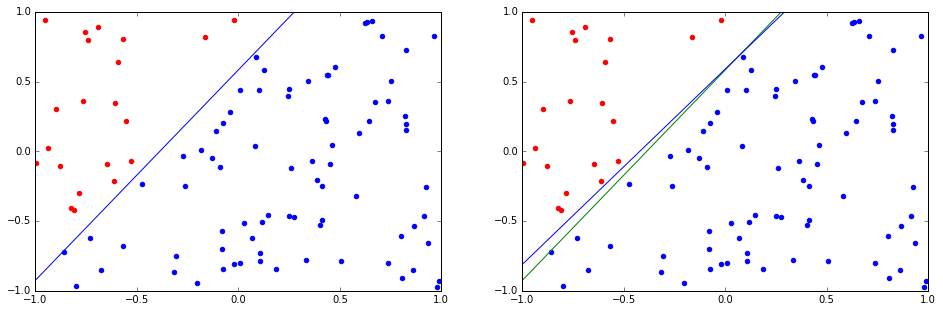

In [101]:
# Example
N_points = 100
experiment(N_points, plot=True)